In [37]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.21.5
pandas version: 1.4.4
scikit-learn version: 1.1.2
matplotlib version: 3.6.1


In [38]:
dfRelevant = pd.DataFrame()

In [39]:
df = pd.read_csv("../data/IGN_data.csv",index_col=0)


In [40]:
df.head()

,game,developers,publishers,franchises,features,released_date,platform,genres,score,score_text,esrb,esrb_info
0,Magic & Mayhem,['Mythos Games'],['Bethesda Softworks'],NaN,"['Memory Card', 'Online']",1999-05-15 00:00:00,['PC'],['Strategy'],7.3,good,Teen,['Animated Violence']
1,Fishing Master [2007],['Hudson Soft'],"['Konami', 'Hudson Soft']",NaN,"['Number Of Players', 'Local - VS # of Players']",2006-03-29 00:00:00,['Wii'],['Hunting'],5.5,mediocre,Everyone,['Mild Language']
2,Far Cry 2,"['Gameloft', 'Ubisoft Montreal']","['Ubisoft', 'Gameloft']",['Far Cry'],"['Memory Card', 'Vibration', 'DualShock', 'Mem...",2008-10-21 00:00:00,"['Luna', 'PC', 'Wireless', 'Xbox 360', 'PlaySt...",['Shooter'],8.9,great,Mature,"['Intense Violence', 'Drug Reference', 'Strong..."
3,Pro 18: World Tour Golf,['Psygnosis'],"['Psygnosis', 'Electro Source']",NaN,"['Number Of Players', 'Memory Card', 'Online']",1999-03-31 00:00:00,"['PC', 'PlayStation']",['Sports'],3.0,awful,Everyone,"['Suitable for Persons Ages Six and Older', 'N..."
4,Bust A Groove,['Metro Corporation (aka Metro Graphics)'],"['Sony Computer Entertainment', 'Enix', '989 S...",['Bust a Groove'],"['Number Of Players', 'Memory Card', 'Vibration']",1998-04-27 00:00:00,['PlayStation'],"['Action', 'Music']",9.0,amazing,Everyone,['Mild Language']


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11362 entries, 0 to 11361
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game           11362 non-null  object 
 1   developers     11050 non-null  object 
 2   publishers     11282 non-null  object 
 3   franchises     6165 non-null   object 
 4   features       8668 non-null   object 
 5   released_date  11307 non-null  object 
 6   platform       11362 non-null  object 
 7   genres         11339 non-null  object 
 8   score          11319 non-null  float64
 9   score_text     11319 non-null  object 
 10  esrb           9490 non-null   object 
 11  esrb_info      8569 non-null   object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [42]:
dfDev = df
dfDev = dfDev[dfDev.developers.notna()]
dfDates = df
dfDates = dfDev[dfDev.released_date.notna()]
dfScore = df
dfScore = dfDates[dfDates.score.notna()]
dfGenres = df
dfGenres = dfScore[dfDates.genres.notna()]
dfDates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11014 entries, 0 to 11361
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game           11014 non-null  object 
 1   developers     11014 non-null  object 
 2   publishers     10966 non-null  object 
 3   franchises     6041 non-null   object 
 4   features       8523 non-null   object 
 5   released_date  11014 non-null  object 
 6   platform       11014 non-null  object 
 7   genres         10995 non-null  object 
 8   score          10976 non-null  float64
 9   score_text     10976 non-null  object 
 10  esrb           9287 non-null   object 
 11  esrb_info      8401 non-null   object 
dtypes: float64(1), object(11)
memory usage: 1.3+ MB


/tmp/ipykernel_1102/698947046.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfGenres = dfScore[dfDates.genres.notna()]


In [43]:
shape = dfGenres.shape


dfRelevant["released_date_f"] = pd.to_datetime(dfGenres["released_date"]).astype(int) / 10**9
# creating a column with datetime properly formatted

# creating predictors to build basic ML model that we can add further complexity to later

# dfGenres["publishers_f"] =dfGenres["publishers"].astype("category").cat.codes # ->one hot encoding
# dfGenres["features_f"] = dfGenres["features"].astype("category").cat.codes # ->one hot encoding
# dfGenres["platform_f"] = dfGenres["platform"].astype("category").cat.codes # ->one hot encoding
# dfGenres["genres_f"] = dfGenres["genres"].astype("category").cat.codes # ->one hot encoding
dfRelevant["esrb_f"] = dfGenres["esrb"].astype("category").cat.codes
# dfRelevant["score_text_f"] = dfGenres["score_text"].astype("category").cat.codes
dfRelevant["franchises_f"] = dfGenres["franchises"].astype("category").cat.codes
#converting from string to categories and then converting those categoties to numbers

In [44]:
dfRelevant

,released_date_f,esrb_f,franchises_f
0,9.267264e+08,5,-1
1,1.143590e+09,1,-1
2,1.224547e+09,3,546
3,9.228384e+08,1,-1
4,8.936352e+08,1,270
...,...,...,...
11357,1.057018e+09,5,-1
11358,9.761472e+08,5,-1
11359,1.212538e+09,1,-1
11360,1.236643e+09,3,840


In [45]:
from sklearn.model_selection import train_test_split
scoring_X = dfRelevant
scoring_y = (dfGenres['score']*10).astype(int)

X_train_scoring, X_test_scoring, y_train_scoring, y_test_scoring = train_test_split(scoring_X, scoring_y, test_size=0.2)

In [46]:
X_test_scoring

,released_date_f,esrb_f,franchises_f
6027,1.353197e+09,1,876
6945,1.211933e+09,1,-1
1978,8.075808e+08,5,1250
10031,1.141258e+09,5,-1
2833,1.038442e+09,5,831
...,...,...,...
4588,4.428864e+08,-1,-1
3639,1.132013e+09,2,997
3223,1.013040e+09,3,-1
7897,1.013731e+09,1,-1


In [47]:
y_test_scoring

6027     91
6945     60
1978     65
10031    77
2833     67
         ..
4588     55
3639     75
3223     78
7897     90
1666     85
Name: score, Length: 2192, dtype: int64

In [48]:
# dfTemp = X_test_scoring
# dfTemp["score"] = y_test_scoring

# ax1 = dfTemp.plot.scatter(x='franchises_f',y='score',c='esrb_f')
# ax2 = dfTemp.plot.scatter(x='esrb_f',y='score')
# ax3 = dfTemp.plot.scatter(x='esrb_f',y='franchises_f',c='score')
# ax4 = dfTemp.plot.scatter(x='franchises_f',y='released_date_f',c='score')

# ax5 = dfTemp.plot.scatter(x='score',y='released_date_f')


In [49]:
# plt.boxplot(dfTemp['score'])
# plt.show()

0.09215328467153285

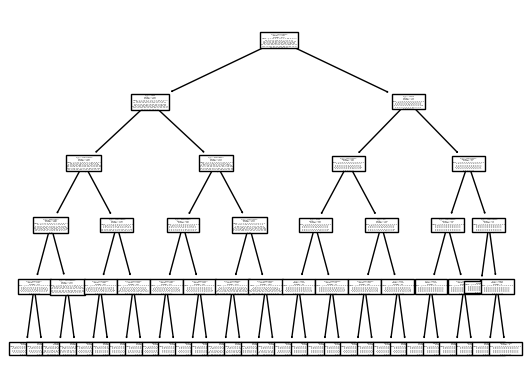

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


treeModel = DecisionTreeClassifier(criterion='entropy', max_depth=5)
treeModel.fit(X_train_scoring,y_train_scoring)
tree.plot_tree(treeModel)

y_pred_tree = treeModel.predict(X_test_scoring)
accuracy_score(y_test_scoring, y_pred_tree)

In [60]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=2)
rf.fit(X_train_scoring,y_train_scoring)

y_pred = rf.predict(X_test_scoring)
accuracy_score(y_test_scoring, y_pred)

0.055656934306569344